Cluster analysis is a multivariate statistical technique that groups observations on the basis of features or variables they are described by.
<br /><br />
<b>K-Means Algorithm:</b>
<br /><br />
The algorithm is very simple given data we first initialize seeds randomly. Then we go on calculating the euclidean distance of every point with every seeds. The one with the minimum distance becomes the part of the given seed. After each and every data is covered we place the seeds into the centroid of the clusters formed. And now that centroid is the representative of that cluster.
<br /><br />
<b>When to use Cluster Analysis?</b>
<br /><br />
This is one of the decision we have to take while dealing with problems. Taking decision is not a tedious task as it solely depends upon the type of data we are using. If we are using a labeled data we can use classification technique whereas in case when the data is not labeled we can cluster the data based on certain feature and try to label it on our own.
<br />
So when we use cluster analysis we don’t have labels(ie.data is not labeled) in the context of machine learning this is called as unsupervised learning.
<br /><br />
<b>Final Goal:</b>
<br /><br />
The goal of clustering is to maximize the similarity of observation within the cluster and maximize the dissimilarity between the clusters.

#### Dataset
- an example of market segmentation. There will be certain features due to which the market is segmented. We will try to analyse the the type of customers in the market based on the features. The data set consist of 30 samples and features are satisfaction and loyalty respectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data =  pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


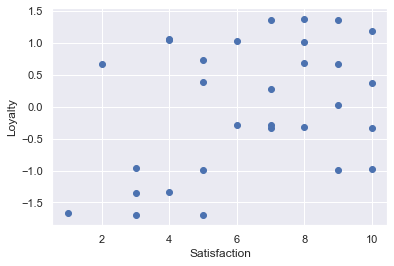

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Clustering

1. Creating a copy of data and storing it in variable x.
2. Create a variable kmeans and by passing the argument 2 in KMeans we just said that we want to create 2 clusters. 

In [6]:
x = data.copy()

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We will again create a copy of x and store it in clusters. We will create a new column called cluster_predict which will have the value as predicted by our kmeans algorithm.

In [9]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Now we will plot the clustered data, note here we have two parameters/features here ‘Satisfaction’ and ‘Loyalty’. We can easily see the two clusters the one with all the red and the other with all the blues. But there is a problem.

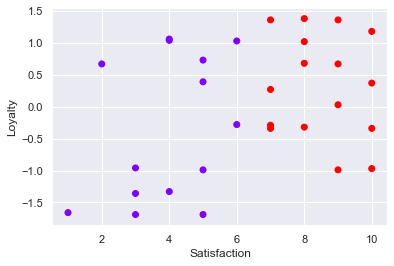

In [10]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Problem

The biggest problem here is that Satisfaction is choosen as a feature and loyalty has been neglected. We can see in the figure that all the element to the right of 6 forms one cluster and the other on the left forms another. This is a bias result because our algorithm has discarded the Loyalty feature. It has done the clustering only on the basis of satisfaction. This does not give an appropriate result through which we can analyze things.
Satisfaction was choosen as the feature because it had large values.
So here is the problem both the data are not scaled. First we have to standardize the data, so that both the data have equal weights in our clustering.
We can’t neglect loyalty as it has an important role in the analyses of market segmentation.

### Standardizing data/scale data

Using sklearn to scale the data. The data is scaled around zero mean. We can see that both the data are equally scaled and now both will have equal chance of being selected as feature.

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### The Elbow Method

Have we ever wondered why we initialized kmeans with 2 clusters only.
<br /><br />
Yes, we could have initialized it with any value we wanted we could have got any number of clusters. But the analyses becomes difficult when there are a large number of clusters. So how we will know the exact number of cluster to start off. Note there are no such exact number as it changes with the problem in hand.
<br /><br />
Here the elbow method comes handy when we are confused as to how may clusters do we need. What elbow method does is it starts of with making one cluster to the number of clusters in our sample and with the kmeans inertia value we determine what would be the appropriate number of clusters.
<br /><br />
Our final goal was to minimize the within the cluster sum of square and maximize the distance between clusters.
<br /><br />
With this simple line of code we get all the inertia value or the within the cluster sum of square (WCSS).

In [12]:
wcss = []
for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.326631124753926,
 4.337110750237059,
 3.751108434710692,
 3.292886890946914,
 2.858217283623201,
 2.564209555480637,
 2.133038721548868,
 1.8633551745672303,
 1.658036263133651,
 1.3877464474636863,
 1.2224658400411028,
 0.9627404738578308,
 0.8384919457944024,
 0.7469709907259051,
 0.5611777216493694,
 0.423130275139057,
 0.34762882648954263,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

### Visualizing the Elbow Method

This graph looks like elbow and we have to determine that elbow point.
<br /><br />
Here the elbow point comes at around 4 and this our optimal number of clusters for the above data which we should choose.
If we look at the figure carefully after 4 when we go on increasing the number of cluster there is no big change in the wcss and it remains constant.
<br /><br />
We have got the optimal number of clusters for our problem.
<br /><br />
We will now quickly perform the kmeans clustering with the new number of clusters which is 4 and then dive into some analysis.

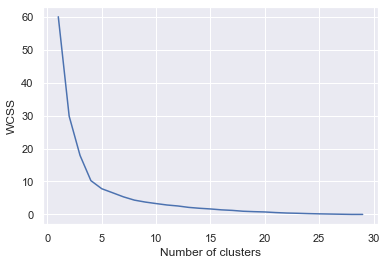

In [13]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here there are four clusters so our whole data is categorized into either 0,1,2 or 3.

In [14]:
kmeans_new=KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,1
9,8,0.68,1


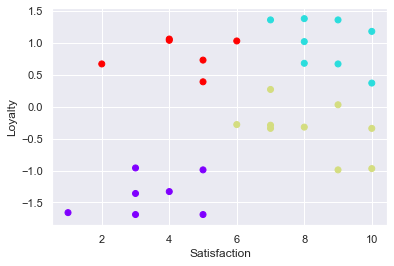

In [15]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c = cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

1. The purple dots are the people who are less satisfied and less loyal and therefore can be termed as alienated.
2. The red dots are people with high loyalty and less satisfaction.
3. The yellow dots are the people with high loyalty and high satisfaction and they are the fans.
4. The sky blue dots are the people who are in the midst of things.

<br />
The ultimate goal of any businessman would be to have as many people up there in the fans category. We are ready with a solution and we can target the audience as per our analysis. For example, the crowd who are supporters can easily be turned into fans by fulfilling their satisfaction level.